In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

## Loading the Boston House Pricing Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_df = load_boston()

/Users/shubhamkumar/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [4]:
type(boston_df)

sklearn.utils._bunch.Bunch

In [5]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Lets check the description of the dataset to begin analysis

In [6]:
print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
print(boston_df.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [8]:
print(boston_df.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [9]:
print(boston_df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### PREPARING THE DATASET

In [10]:
dataset = pd.DataFrame(boston_df.data, columns = boston_df.feature_names)

In [11]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
dataset['Price'] = boston_df.target

In [13]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All the features are numerical. No categorical features in the data.

### Statistics of the data

In [15]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Checking the missing values

In [16]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

The dataset doesnot contain any missing values

## EDA

Correlation

In [17]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Text(0, 0.5, 'Price')

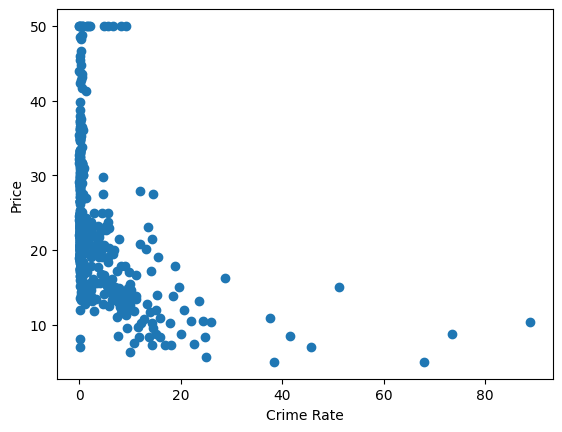

In [18]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<AxesSubplot: xlabel='CRIM', ylabel='Price'>

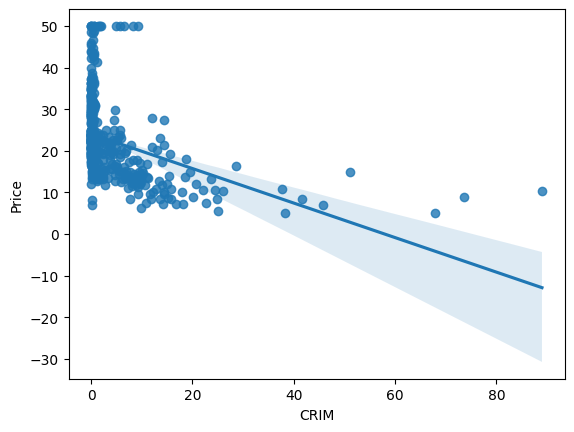

In [19]:
sns.regplot(x = "CRIM", y = "Price", data = dataset)

Text(0, 0.5, 'Price')

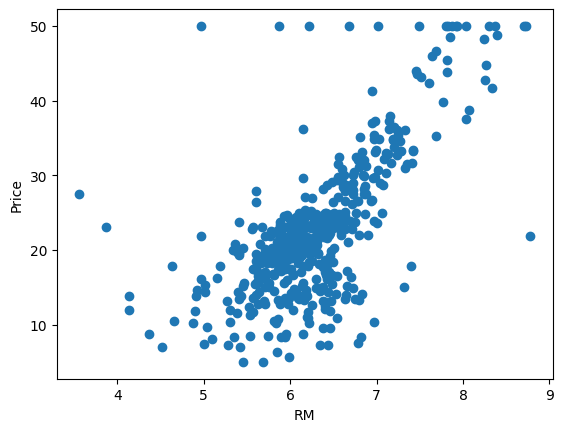

In [20]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<AxesSubplot: xlabel='RM', ylabel='Price'>

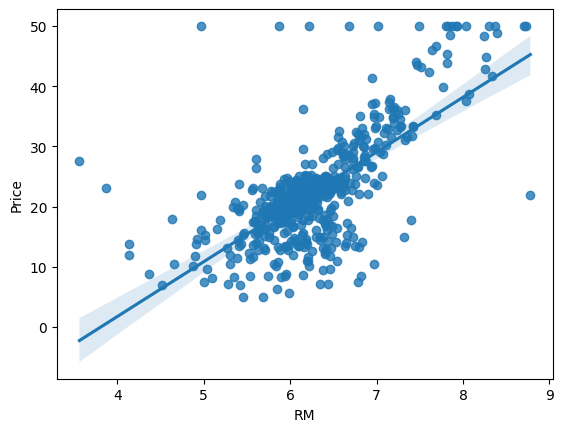

In [21]:
sns.regplot(x = "RM", y = "Price", data = dataset)

<AxesSubplot: xlabel='LSTAT', ylabel='Price'>

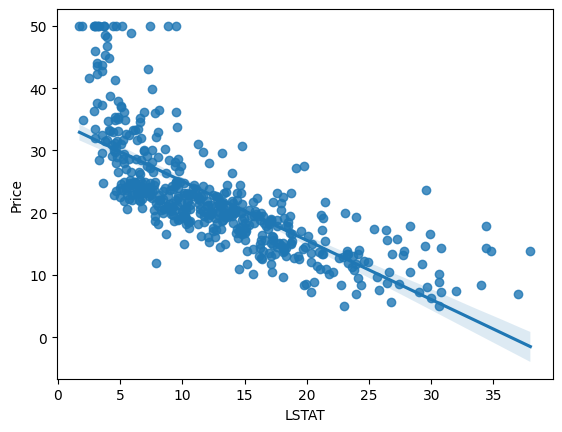

In [22]:
sns.regplot(x = "LSTAT", y = "Price", data = dataset)

<AxesSubplot: xlabel='CHAS', ylabel='Price'>

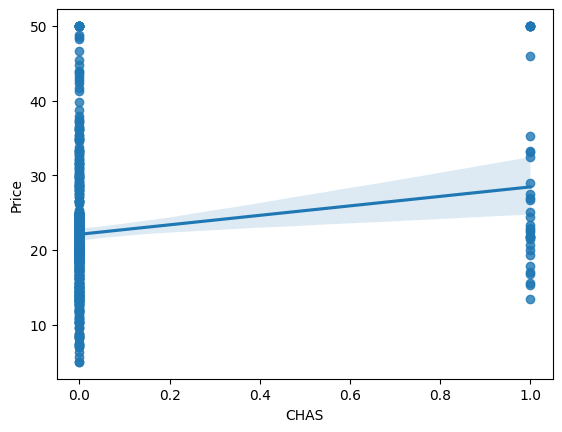

In [23]:
sns.regplot(x = "CHAS", y = "Price", data = dataset)

<AxesSubplot: xlabel='PTRATIO', ylabel='Price'>

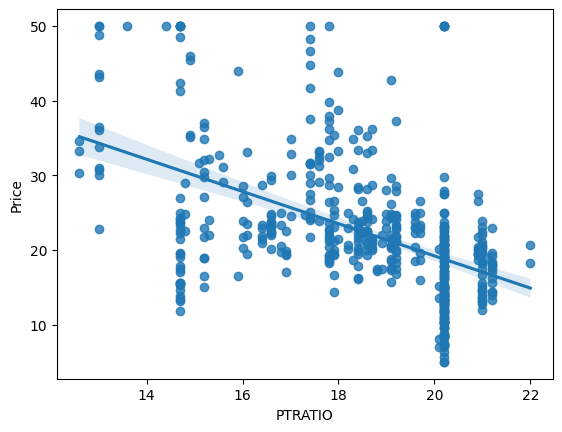

In [24]:
sns.regplot(x = "PTRATIO", y = "Price", data = dataset)

### Dividing dataset into independent and dependent features

In [25]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [26]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

## Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.3, random_state = 30)

In [29]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
462,6.65492,0.0,18.10,0.0,0.713,6.317,83.0,2.7344,24.0,666.0,20.2,396.90,13.99
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
409,14.43830,0.0,18.10,0.0,0.597,6.852,100.0,1.4655,24.0,666.0,20.2,179.36,19.78
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
301,0.03537,34.0,6.09,0.0,0.433,6.590,40.4,5.4917,7.0,329.0,16.1,395.75,9.50
429,9.33889,0.0,18.10,0.0,0.679,6.380,95.6,1.9682,24.0,666.0,20.2,60.72,24.08
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70


In [30]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,329.0,12.6,354.31,8.61
180,0.06588,0.0,2.46,0.0,0.488,7.765,83.3,2.7410,3.0,193.0,17.8,395.56,7.56
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
290,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33


## Standardizing the dataset

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[-0.36674596, -0.50097557,  1.63393715, ...,  1.26531104,
         0.22331214,  0.6458033 ],
       [ 0.28684993, -0.50097557,  1.07239917, ...,  0.80759583,
         0.42844561,  0.23131397],
       [ 2.15989737, -0.50097557,  1.07239917, ...,  0.80759583,
         0.42844561,  1.05459519],
       ...,
       [ 0.56387997, -0.50097557,  1.07239917, ...,  0.80759583,
        -3.26923637,  1.66849519],
       [ 0.32479955, -0.50097557,  1.07239917, ...,  0.80759583,
        -0.4176062 ,  0.47487987],
       [-0.39151689, -0.50097557,  0.4530776 , ..., -1.11480807,
         0.42844561, -0.53926585]])

In [35]:
X_test

array([[-0.31210314, -0.50097557, -0.40330486, ...,  1.173768  ,
         0.38037948,  0.20852418],
       [ 1.87599002, -0.50097557,  1.07239917, ...,  0.80759583,
         0.36850044,  1.38789589],
       [-0.37820609, -0.50097557, -0.34107638, ...,  1.12799648,
         0.40171776,  0.15297406],
       ...,
       [-0.38821913,  0.32987639, -0.57813726, ...,  0.07525148,
         0.40710733, -0.66033662],
       [-0.3964331 ,  2.82243227, -0.87594501, ...,  0.34988061,
         0.42844561, -1.28705589],
       [-0.3903681 ,  0.01830691, -0.44330888, ..., -1.48098024,
         0.35805128,  0.47630423]])

## Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
linear = LinearRegression()

In [38]:
linear.fit(X_train, y_train)

LinearRegression()

### Print the co-efficient and the intercepts

In [39]:
print(linear.coef_)

[-1.10616446  1.0140359  -0.1031787   0.87291462 -1.84907876  3.03013364
 -0.24548803 -3.12828083  3.15131315 -2.65484875 -2.03912493  0.52453944
 -3.4247436 ]


In [40]:
print(linear.intercept_)

22.73700564971757


### Parameters on which the model has been trained

In [41]:
linear.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [42]:
pred = linear.predict(X_test)

In [43]:
pred

array([17.39147327, 12.41363413, 19.85934436, 31.50042761, 15.75702458,
       17.73775642, 20.17320567, 41.71916027, 15.46522809, 24.26095398,
       20.01457803, 33.07568558, 21.68100058, 29.718935  , 12.93159771,
       24.28727871, 14.44400397, 28.05153449, 15.20149991, 27.09665867,
       20.82169746, 17.95261421, 31.0691493 , 13.16333568, 15.63311811,
       16.63054263, 18.16733424,  0.29215425, 13.95084182, 13.58747266,
       17.14003356, 22.94799107, 32.95880782, 29.04028663, 19.29448342,
       22.5893101 , 11.49999544, 22.28666304, 20.01865476, 19.00002805,
       17.49110066, 20.11111319, 41.16072928, 24.13584018, 26.37625232,
       21.02007219, 22.5888486 , 17.79446088, 18.37245128, 14.65491197,
       15.4173279 , 18.13399454, 18.92506322, 25.21839007, 30.9718008 ,
       23.22956707, 36.599214  , 25.00731145, 14.99849288, 36.08166587,
       23.31314286, 20.15243908, 31.22702779, 20.38266922, 18.10085483,
       11.2312021 , 17.34187307, 24.47962875, 35.59846762, 32.67

### Plotting a scatter plot for the prediction

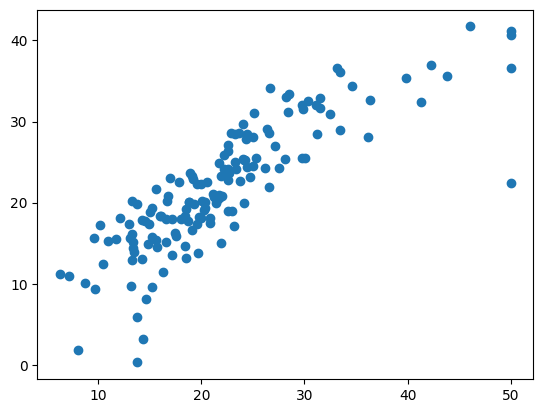

In [44]:
plt.scatter(y_test, pred)

In [45]:
Residual = y_test - pred

In [46]:
Residual

21     2.208527
440   -1.913634
103   -0.559344
178   -1.600428
22    -0.557025
         ...   
197   -2.215870
180    4.471083
272   -4.120939
290   -4.884930
12     0.705266
Name: Price, Length: 152, dtype: float64

### Plot this residual

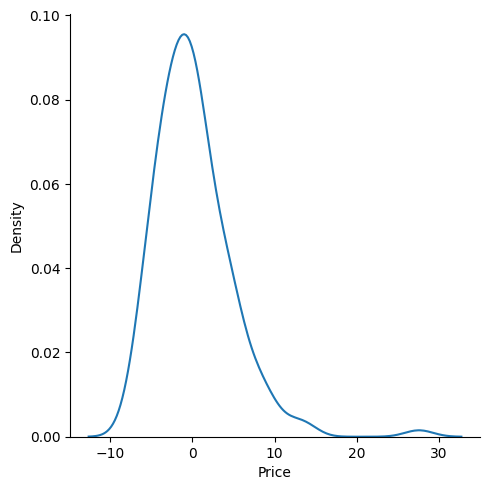

In [47]:
sns.displot(Residual, kind='kde')

## Scatter plot wrt prediction and residuals

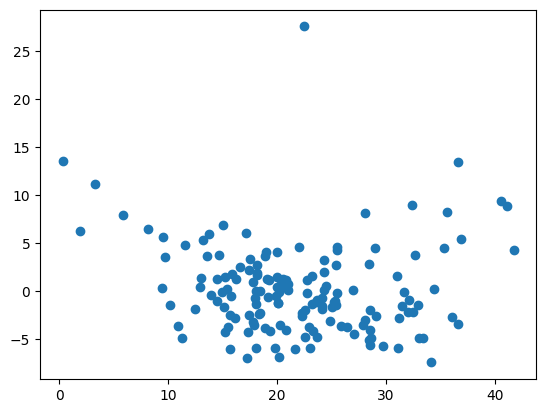

In [48]:
plt.scatter(pred, Residual)

## Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [50]:
print("Mean Squared Error: ", mean_squared_error(y_test, pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, pred))
print("Root of Mean Of Square: ",np.sqrt(mean_squared_error(y_test, pred)))

Mean Squared Error:  21.900224223458892
Mean Absolute Error:  3.382328457043978
Root of Mean Of Square:  4.679767539468055


### R square and Adjusted R square

Formula

R^2 = 1 - RSS/TSS

RSS = Residual sum of square

TSS = Total sum of square

Adjusted R2 = 1 - [((1 - R2) * (n - 1)) / (n - k - 1)]

n = Total number of observations

k = Number of predictor variables

Adjusted R2 will always be less than R2

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
print(score)

0.7051993010219368


For adjusted R2

In [52]:
1 - (1 - score)*(len(y_test) - 1)/(len(y_test)-X_test.shape[1]-1)

0.6774282206834237

## New Data Prediction

In [53]:
boston_df.data[0].reshape(1, -1).shape

(1, 13)

In [54]:
boston_df.data[0].reshape(1, -1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

Transformation of new datadet

In [55]:
scaler.transform(boston_df.data[0].reshape(1,-1))

/Users/shubhamkumar/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.39939541,  0.2467912 , -1.26709547, -0.26360274, -0.13107853,
         0.37217696, -0.10120209,  0.12829664, -0.97322533, -0.64346542,
        -1.43520872,  0.42844561, -1.05203616]])

In [56]:
linear.predict(scaler.transform(boston_df.data[0].reshape(1, -1)))

/Users/shubhamkumar/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.718935])

## Pickling the model file for deployment

In [57]:
import pickle

In [58]:
pickle.dump(linear, open('linmodel.pkl','wb'))

In [60]:
pickle_model = pickle.load(open('linmodel.pkl', 'rb'))

Prediction

In [61]:
pickle_model.predict(scaler.transform(boston_df.data[0].reshape(1,-1)))

/Users/shubhamkumar/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.718935])